In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from collections import deque

# **Game board construction**

---


In [ ]:
Graph_gameboard = nx.Graph()

# Add nodes to the graph
cities = {
    'Essen': 'blue',
    'St Petersburg': 'blue',
    'Milan': 'blue',
    'Paris': 'blue',
    'London': 'blue',
    'Madrid': 'blue',
    'New York': 'blue',
    'Toronto / Montreal': 'blue',
    'Washington': 'blue',
    'Atlanta': 'blue',
    'Chicago': 'blue',
    'San Francisco': 'blue',
    'Los Angeles': 'yellow',
    'Santiago': 'yellow',
    'Lima': 'yellow',
    'Mexico City': 'yellow',
    'Miami': 'yellow',
    'Bogota': 'yellow',
    'Sao Paulo': 'yellow',
    'Buenos Aires': 'yellow',
    'Lagos': 'yellow',
    'Kinshasa': 'yellow',
    'Khartoum': 'yellow',
    'Johannesburg': 'yellow',
    'Algiers': 'black',
    'Cairo': 'black',
    'Istanbul': 'black',
    'Moscow': 'black',
    'Baghdad': 'black',
    'Riyadh': 'black',
    'Tehran': 'black',
    'Karachi': 'black',
    'Delhi': 'black',
    'Mumbai': 'black',
    'Kolkata': 'black',
    'Chennai': 'black',
    'Seoul': 'red',
    'Tokyo': 'red',
    'Osaka': 'red',
    'Beijing': 'red',
    'Shanghai': 'red',
    'Taipei': 'red',
    'Hong Kong': 'red',
    'Manila': 'red',
    'Bangkok': 'red',
    'Jakarta': 'red',
    'Ho Chi Minh City': 'red',
    'Sydney': 'red',
}

for city, color in cities.items():
    Graph_gameboard.add_node(city, color=color)

# Add edges between nodes
edges = [
    ('Essen', 'St Petersburg'),
    ('Essen', 'London'),
    ('Essen', 'Paris'),
    ('Essen', 'Milan'),
    ('San Francisco', 'Manila'),
    ('San Francisco', 'Tokyo'),
    ('San Francisco', 'Chicago'),
    ('San Francisco', 'Los Angeles'),
    ('Los Angeles', 'Chicago'),
    ('Los Angeles', 'Mexico City'),
    ('Los Angeles', 'Sydney'),
    ('Chicago', 'Toronto / Montreal'),
    ('Chicago', 'Atlanta'),
    ('Chicago', 'Mexico City'),
    ('Santiago', 'Lima'),
    ('Toronto / Montreal', 'New York'),
    ('Toronto / Montreal', 'Washington'),
    ('Atlanta', 'Washington'),
    ('Atlanta', 'Miami'),
    ('Mexico City', 'Miami'),
    ('Mexico City', 'Bogota'),
    ('Lima', 'Mexico City'),
    ('Lima', 'Bogota'),
    ('New York', 'London'),
    ('New York', 'Madrid'),
    ('New York', 'Washington'),
    ('Washington', 'Miami'),
    ('Miami', 'Bogota'),
    ('Bogota', 'Sao Paulo'),
    ('Bogota', 'Buenos Aires'),
    ('London', 'Essen'),
    ('London', 'Paris'),
    ('London', 'Madrid'),
    ('Madrid', 'Paris'),
    ('Madrid', 'Algiers'),
    ('Madrid', 'Sao Paulo'),
    ('Sao Paulo', 'Lagos'),
    ('Sao Paulo', 'Buenos Aires'),
    ('Paris', 'Milan'),
    ('Paris', 'Algiers'),
    ('Lagos', 'Khartoum'),
    ('Lagos', 'Kinshasa'),
    ('Kinshasa', 'Khartoum'),
    ('Kinshasa', 'Johannesburg'),
    ('St Petersburg', 'Moscow'),
    ('St Petersburg', 'Istanbul'),
    ('Milan', 'Istanbul'),
    ('Algiers', 'Istanbul'),
    ('Algiers', 'Cairo'),
    ('Khartoum', 'Cairo'),
    ('Istanbul', 'Moscow'),
    ('Istanbul', 'Baghdad'),
    ('Istanbul', 'Cairo'),
    ('Cairo', 'Baghdad'),
    ('Cairo', 'Riyadh'),
    ('Moscow', 'Tehran'),
    ('Baghdad', 'Tehran'),
    ('Baghdad', 'Karachi'),
    ('Baghdad', 'Riyadh'),
    ('Riyadh', 'Karachi'),
    ('Tehran', 'Delhi'),
    ('Karachi', 'Delhi'),
    ('Karachi', 'Mumbai'),
    ('Delhi', 'Kolkata'),
    ('Delhi', 'Chennai'),
    ('Delhi', 'Mumbai'),
    ('Mumbai', 'Chennai'),
    ('Seoul', 'Tokyo'),
    ('Seoul', 'Shanghai'),
    ('Seoul', 'Beijing'),
    ('Beijing', 'Shanghai'),
    ('Kolkata', 'Hong Kong'),
    ('Kolkata', 'Bangkok'),
    ('Kolkata', 'Chennai'),
    ('Chennai', 'Bangkok'),
    ('Chennai', 'Jakarta'),
    ('Tokyo', 'Osaka'),
    ('Tokyo', 'Shanghai'),
    ('Shanghai', 'Taipei'),
    ('Shanghai', 'Hong Kong'),
    ('Bangkok', 'Hong Kong'),
    ('Bangkok', 'Ho Chi Minh City'),
    ('Bangkok', 'Jakarta'),
    ('Jakarta', 'Sydney'),
    ('Osaka', 'Taipei'),
    ('Taipei', 'Manila'),
    ('Taipei', 'Hong Kong'),
    ('Hong Kong', 'Manila'),
    ('Hong Kong', 'Ho Chi Minh City'),
    ('Ho Chi Minh City', 'Manila'),
    ('Manila', 'Sydney'),
]

Graph_gameboard.add_edges_from(edges)

In [ ]:
node_positions = {
    'Essen': (120, 80),
    'St Petersburg': (140, 80),
    'Milan': (140, 60),
    'Paris': (120, 60),
    'London': (100, 60),
    'Madrid': (100, 40),
    'New York': (80, 60),
    'Toronto / Montreal': (60, 60),
    'Washington': (80, 40),
    'Atlanta': (60, 40),
    'Chicago': (40, 40),
    'Los Angeles': (20, 20),
    'San Francisco': (20, 40),
    'Santiago': (40, 0),
    'Lima': (60, 0),
    'Mexico City': (60, 20),
    'Miami': (80, 20),
    'Bogota': (80, 0),
    'Sao Paulo': (100, 20),
    'Buenos Aires': (100, 0),
    'Lagos': (120, 20),
    'Kinshasa': (120, 0),
    'Khartoum': (140, 20),
    'Johannesburg': (140, 0),
    'Algiers': (140, 40),
    'Cairo': (160, 40),
    'Istanbul': (160, 60),
    'Moscow': (180, 80),
    'Baghdad': (180, 60),
    'Riyadh': (180, 40),
    'Tehran': (200, 60),
    'Karachi': (200, 40),
    'Delhi': (220, 40),
    'Mumbai': (220, 20),
    'Kolkata': (240, 40),
    'Chennai': (240, 20),
    'Seoul': (240, 80),
    'Tokyo': (260, 80),
    'Osaka': (280, 80),
    'Beijing': (240, 60),
    'Shanghai': (260, 60),
    'Taipei': (280, 60),
    'Hong Kong': (280, 40),
    'Manila': (300, 40),
    'Bangkok': (260, 20),
    'Jakarta': (260, 0),
    'Ho Chi Minh City': (280, 20),
    'Sydney': (300, 0),
}

In [ ]:
disease_counters = {
    'Essen': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'St Petersburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Milan': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Paris': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'London': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Madrid': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'New York': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Toronto / Montreal': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Washington': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Atlanta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chicago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'San Francisco': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Los Angeles': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Santiago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lima': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mexico City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Miami': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bogota': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sao Paulo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Buenos Aires': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lagos': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kinshasa': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Khartoum': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Johannesburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Algiers': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Cairo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Istanbul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Moscow': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Baghdad': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Riyadh': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tehran': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Karachi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Delhi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mumbai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kolkata': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chennai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Seoul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tokyo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Osaka': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Beijing': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Shanghai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Taipei': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Hong Kong': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Manila': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bangkok': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Jakarta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Ho Chi Minh City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sydney': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
}


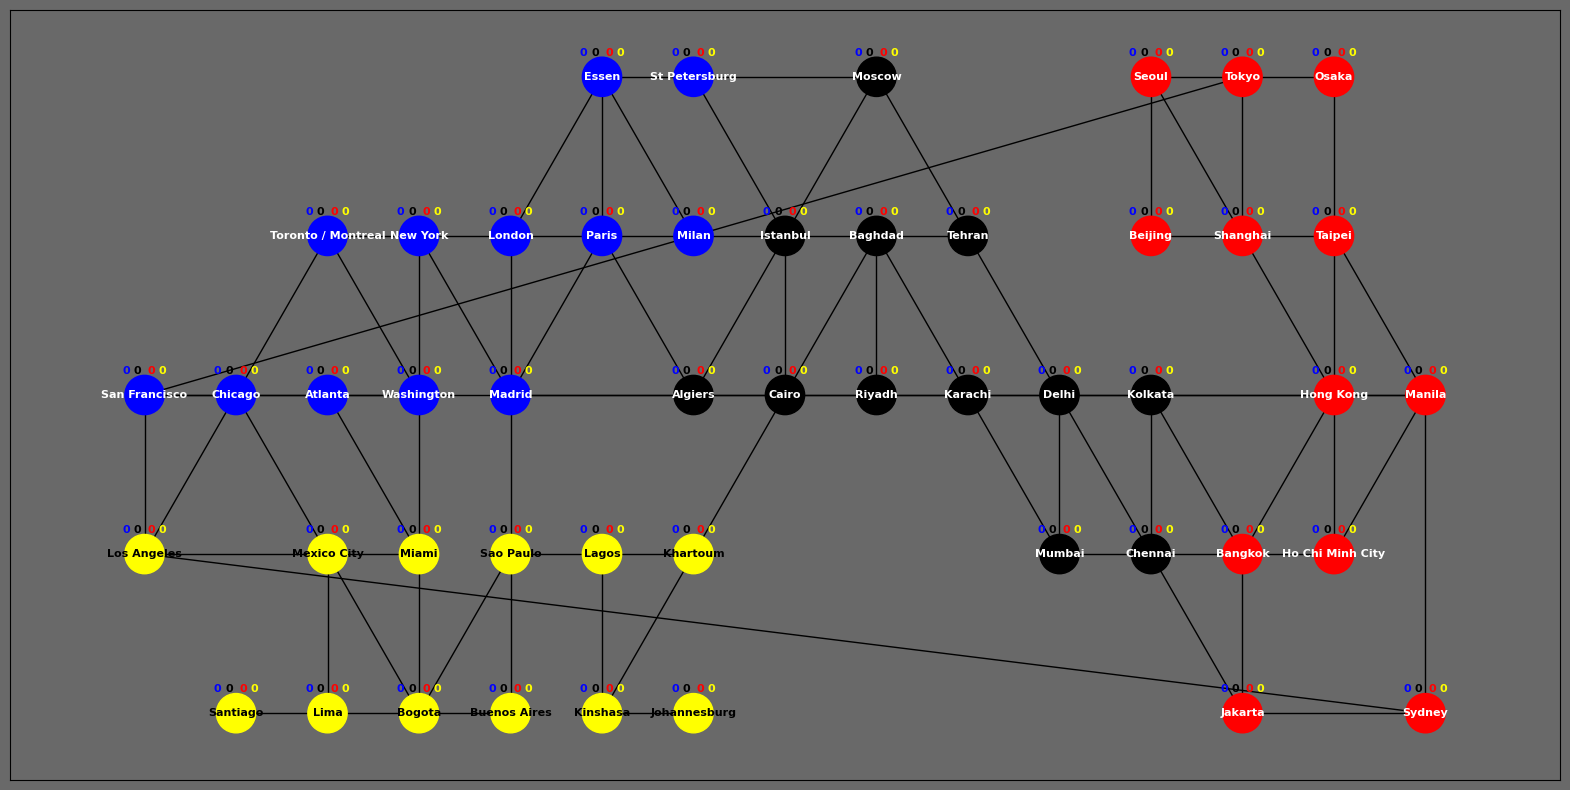

In [ ]:
nx.set_node_attributes(Graph_gameboard, disease_counters, 'disease_counters')

fig, ax = plt.subplots(figsize=(20, 10))

node_colors = [cities[city] for city in Graph_gameboard.nodes()]

# change font of nodes with yellow color
yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

# Draw the nodes
nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

# Draw the edges
nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

# Add labels manually with specified colors
for node, (x, y) in node_positions.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

ax.set_facecolor('#696969')
fig.set_facecolor('#696969')

font_colors_disease_counter = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

for node, (x, y) in node_positions.items():
    counters = Graph_gameboard.nodes[node]['disease_counters']

    # Construct labels for each counter with its color
    blue_label = f"{counters['blue']}"
    black_label = f"{counters['black']}"
    red_label = f"{counters['red']}"
    yellow_label = f"{counters['yellow']}"

    # Draw the text for each counter with its color
    plt.text(x - 4, y + 3, blue_label, fontsize=8, ha='center', va='center', color='blue', weight='bold')
    plt.text(x - 1.5, y + 3, black_label, fontsize=8, ha='center', va='center', color='black', weight='bold')
    plt.text(x + 1.5, y + 3, red_label, fontsize=8, ha='center', va='center', color='red', weight='bold')
    plt.text(x + 4, y + 3, yellow_label, fontsize=8, ha='center', va='center', color='yellow', weight='bold')

plt.show()

In [ ]:
def setMap():
    Graph_gameboard = nx.Graph()

# Add nodes to the graph
    cities = {
    'Essen': 'blue',
    'St Petersburg': 'blue',
    'Milan': 'blue',
    'Paris': 'blue',
    'London': 'blue',
    'Madrid': 'blue',
    'New York': 'blue',
    'Toronto / Montreal': 'blue',
    'Washington': 'blue',
    'Atlanta': 'blue',
    'Chicago': 'blue',
    'San Francisco': 'blue',
    'Los Angeles': 'yellow',
    'Santiago': 'yellow',
    'Lima': 'yellow',
    'Mexico City': 'yellow',
    'Miami': 'yellow',
    'Bogota': 'yellow',
    'Sao Paulo': 'yellow',
    'Buenos Aires': 'yellow',
    'Lagos': 'yellow',
    'Kinshasa': 'yellow',
    'Khartoum': 'yellow',
    'Johannesburg': 'yellow',
    'Algiers': 'black',
    'Cairo': 'black',
    'Istanbul': 'black',
    'Moscow': 'black',
    'Baghdad': 'black',
    'Riyadh': 'black',
    'Tehran': 'black',
    'Karachi': 'black',
    'Delhi': 'black',
    'Mumbai': 'black',
    'Kolkata': 'black',
    'Chennai': 'black',
    'Seoul': 'red',
    'Tokyo': 'red',
    'Osaka': 'red',
    'Beijing': 'red',
    'Shanghai': 'red',
    'Taipei': 'red',
    'Hong Kong': 'red',
    'Manila': 'red',
    'Bangkok': 'red',
    'Jakarta': 'red',
    'Ho Chi Minh City': 'red',
    'Sydney': 'red',
}

    for city, color in cities.items():
        Graph_gameboard.add_node(city, color=color)

# Add edges between nodes
    edges = [
    ('Essen', 'St Petersburg'),
    ('Essen', 'London'),
    ('Essen', 'Paris'),
    ('Essen', 'Milan'),
    ('San Francisco', 'Manila'),
    ('San Francisco', 'Tokyo'),
    ('San Francisco', 'Chicago'),
    ('San Francisco', 'Los Angeles'),
    ('Los Angeles', 'Chicago'),
    ('Los Angeles', 'Mexico City'),
    ('Los Angeles', 'Sydney'),
    ('Chicago', 'Toronto / Montreal'),
    ('Chicago', 'Atlanta'),
    ('Chicago', 'Mexico City'),
    ('Santiago', 'Lima'),
    ('Toronto / Montreal', 'New York'),
    ('Toronto / Montreal', 'Washington'),
    ('Atlanta', 'Washington'),
    ('Atlanta', 'Miami'),
    ('Mexico City', 'Miami'),
    ('Mexico City', 'Bogota'),
    ('Lima', 'Mexico City'),
    ('Lima', 'Bogota'),
    ('New York', 'London'),
    ('New York', 'Madrid'),
    ('New York', 'Washington'),
    ('Washington', 'Miami'),
    ('Miami', 'Bogota'),
    ('Bogota', 'Sao Paulo'),
    ('Bogota', 'Buenos Aires'),
    ('London', 'Essen'),
    ('London', 'Paris'),
    ('London', 'Madrid'),
    ('Madrid', 'Paris'),
    ('Madrid', 'Algiers'),
    ('Madrid', 'Sao Paulo'),
    ('Sao Paulo', 'Lagos'),
    ('Sao Paulo', 'Buenos Aires'),
    ('Paris', 'Milan'),
    ('Paris', 'Algiers'),
    ('Lagos', 'Khartoum'),
    ('Lagos', 'Kinshasa'),
    ('Kinshasa', 'Khartoum'),
    ('Kinshasa', 'Johannesburg'),
    ('St Petersburg', 'Moscow'),
    ('St Petersburg', 'Istanbul'),
    ('Milan', 'Istanbul'),
    ('Algiers', 'Istanbul'),
    ('Algiers', 'Cairo'),
    ('Khartoum', 'Cairo'),
    ('Istanbul', 'Moscow'),
    ('Istanbul', 'Baghdad'),
    ('Istanbul', 'Cairo'),
    ('Cairo', 'Baghdad'),
    ('Cairo', 'Riyadh'),
    ('Moscow', 'Tehran'),
    ('Baghdad', 'Tehran'),
    ('Baghdad', 'Karachi'),
    ('Baghdad', 'Riyadh'),
    ('Riyadh', 'Karachi'),
    ('Tehran', 'Delhi'),
    ('Karachi', 'Delhi'),
    ('Karachi', 'Mumbai'),
    ('Delhi', 'Kolkata'),
    ('Delhi', 'Chennai'),
    ('Delhi', 'Mumbai'),
    ('Mumbai', 'Chennai'),
    ('Seoul', 'Tokyo'),
    ('Seoul', 'Shanghai'),
    ('Seoul', 'Beijing'),
    ('Beijing', 'Shanghai'),
    ('Kolkata', 'Hong Kong'),
    ('Kolkata', 'Bangkok'),
    ('Kolkata', 'Chennai'),
    ('Chennai', 'Bangkok'),
    ('Chennai', 'Jakarta'),
    ('Tokyo', 'Osaka'),
    ('Tokyo', 'Shanghai'),
    ('Shanghai', 'Taipei'),
    ('Shanghai', 'Hong Kong'),
    ('Bangkok', 'Hong Kong'),
    ('Bangkok', 'Ho Chi Minh City'),
    ('Bangkok', 'Jakarta'),
    ('Jakarta', 'Sydney'),
    ('Osaka', 'Taipei'),
    ('Taipei', 'Manila'),
    ('Taipei', 'Hong Kong'),
    ('Hong Kong', 'Manila'),
    ('Hong Kong', 'Ho Chi Minh City'),
    ('Ho Chi Minh City', 'Manila'),
    ('Manila', 'Sydney'),
]

    Graph_gameboard.add_edges_from(edges)
    node_positions = {
    'Essen': (120, 80),
    'St Petersburg': (140, 80),
    'Milan': (140, 60),
    'Paris': (120, 60),
    'London': (100, 60),
    'Madrid': (100, 40),
    'New York': (80, 60),
    'Toronto / Montreal': (60, 60),
    'Washington': (80, 40),
    'Atlanta': (60, 40),
    'Chicago': (40, 40),
    'Los Angeles': (20, 20),
    'San Francisco': (20, 40),
    'Santiago': (40, 0),
    'Lima': (60, 0),
    'Mexico City': (60, 20),
    'Miami': (80, 20),
    'Bogota': (80, 0),
    'Sao Paulo': (100, 20),
    'Buenos Aires': (100, 0),
    'Lagos': (120, 20),
    'Kinshasa': (120, 0),
    'Khartoum': (140, 20),
    'Johannesburg': (140, 0),
    'Algiers': (140, 40),
    'Cairo': (160, 40),
    'Istanbul': (160, 60),
    'Moscow': (180, 80),
    'Baghdad': (180, 60),
    'Riyadh': (180, 40),
    'Tehran': (200, 60),
    'Karachi': (200, 40),
    'Delhi': (220, 40),
    'Mumbai': (220, 20),
    'Kolkata': (240, 40),
    'Chennai': (240, 20),
    'Seoul': (240, 80),
    'Tokyo': (260, 80),
    'Osaka': (280, 80),
    'Beijing': (240, 60),
    'Shanghai': (260, 60),
    'Taipei': (280, 60),
    'Hong Kong': (280, 40),
    'Manila': (300, 40),
    'Bangkok': (260, 20),
    'Jakarta': (260, 0),
    'Ho Chi Minh City': (280, 20),
    'Sydney': (300, 0),
}
    disease_counters = {
    'Essen': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'St Petersburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Milan': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Paris': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'London': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Madrid': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'New York': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Toronto / Montreal': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Washington': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Atlanta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chicago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'San Francisco': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Los Angeles': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Santiago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lima': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mexico City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Miami': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bogota': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sao Paulo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Buenos Aires': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lagos': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kinshasa': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Khartoum': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Johannesburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Algiers': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Cairo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Istanbul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Moscow': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Baghdad': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Riyadh': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tehran': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Karachi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Delhi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mumbai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kolkata': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chennai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Seoul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tokyo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Osaka': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Beijing': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Shanghai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Taipei': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Hong Kong': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Manila': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bangkok': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Jakarta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Ho Chi Minh City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sydney': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    }
    nx.set_node_attributes(Graph_gameboard, disease_counters, 'disease_counters')

    fig, ax = plt.subplots(figsize=(20, 10))

    node_colors = [cities[city] for city in Graph_gameboard.nodes()]

    # change font of nodes with yellow color
    yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
    font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

    # Draw the nodes
    nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

    # Draw the edges
    nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

    # Add labels manually with specified colors
    for node, (x, y) in node_positions.items():
        plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

    ax.set_facecolor('#696969')
    fig.set_facecolor('#696969')

    font_colors_disease_counter = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

    for node, (x, y) in node_positions.items():
        counters = Graph_gameboard.nodes[node]['disease_counters']

        # Construct labels for each counter with its color
        blue_label = f"{counters['blue']}"
        black_label = f"{counters['black']}"
        red_label = f"{counters['red']}"
        yellow_label = f"{counters['yellow']}"

        # Draw the text for each counter with its color
        plt.text(x - 4, y + 3, blue_label, fontsize=8, ha='center', va='center', color='blue', weight='bold')
        plt.text(x - 1.5, y + 3, black_label, fontsize=8, ha='center', va='center', color='black', weight='bold')
        plt.text(x + 1.5, y + 3, red_label, fontsize=8, ha='center', va='center', color='red', weight='bold')
        plt.text(x + 4, y + 3, yellow_label, fontsize=8, ha='center', va='center', color='yellow', weight='bold')

    #plt.show()

# **Helperfunctions**

---

In [ ]:
#@title initialize_pandemic_model
# Initialize the infected cities
def initialize_pandemic_model(graph, strategy, k_action):
    # 96 Cubes 24 in 4 Colors
    # 48 cities
    # 6 Epidemic card
    # Infection rate 7 tiles, (2,2,2,3,3,4,4)
    # Outbreak marker 8 tiles

    # Get and shuffle all Nodes
    num_nodes = graph.number_of_nodes()
    all_nodes = list(graph.nodes)
    random.shuffle(all_nodes)

    # Initialize stacks
    infection_discard_stack = deque()
    infection_stack = deque(all_nodes)
    player_stack = deque()

    # k Nodes to infect at the start (Pandemic normal value is always 3x3, 3x2, 3x1 total 9 nodes)
    k_nodes_to_infect = 3

    # Set the amount of epidemic cards (4,5,6 Pandemic)
    epidemics = 6

    infection_rate = [2, 2, 2, 3, 3, 4, 4]
    infection_rate_counter = 0
    outbreak_counter = 0

    k_actions = k_action

    # Set the disinfection strategy
    disinfection_strategy = strategy

    # -------------------------------
    # Start of Epidemic Cards Setup
    # -------------------------------

    # Calculate the chunk size for the epidemics (Floor division)
    chunk_size = num_nodes // epidemics

    # Add chunks with one epidemic node to the player deck
    for i in range(epidemics):
        if i == epidemics - 1:
            chunk = random.sample(all_nodes, len(all_nodes))
        else:
            chunk = random.sample(all_nodes, chunk_size)

        chunk.extend(["Epidemic"])
        random.shuffle(chunk)
        player_stack.extend(chunk)

        # Remove nodes used in this chunk
        all_nodes = list(set(all_nodes) - set(chunk))

    # Shuffle the deque in-place
    #random.shuffle(player_stack)
    # -------------------------------
    # End of Epidemic Cards Setup
    # -------------------------------

    # -------------------------------
    # Start of Node infection
    # -------------------------------

    # Infect k nodes with 3 disease counters (blue)
    for _ in range(k_nodes_to_infect):
        node = infection_stack.pop()
        graph.nodes[node]["disease_counters"]["blue"] = 3
        infection_discard_stack.append(node)

    # Infect k nodes with 2 disease counters (blue)
    for _ in range(k_nodes_to_infect):
        node = infection_stack.pop()
        graph.nodes[node]["disease_counters"]["blue"] = 2
        infection_discard_stack.append(node)

    # Infect k nodes with 1 disease counter (blue)
    for _ in range(k_nodes_to_infect):
        node = infection_stack.pop()
        graph.nodes[node]["disease_counters"]["blue"] = 1
        infection_discard_stack.append(node)

    # Set the remaining nodes to have 0 disease counters
    for node in infection_stack:
        graph.nodes[node]["disease_counters"]["blue"] = 0

    # -------------------------------
    # End of Node infection
    # -------------------------------

    # Set node attributes
    #nx.set_node_attributes(graph, 0, "disease_counters")

    # Initialize the sisr_model
    pandemic_model = {"graph": graph,
                      "infection_stack": infection_stack,
                      "infection_discard_stack": infection_discard_stack,
                      "player_stack": player_stack,
                      "infection_rate": infection_rate,
                      "infection_rate_counter": infection_rate_counter,
                      "outbreak_counter": outbreak_counter,
                      "disinfection_strategy": disinfection_strategy,
                      "k_actions": k_actions}

    return pandemic_model

In [ ]:
#@title print_map
def print_map():
    nx.set_node_attributes(Graph_gameboard, disease_counters, 'disease_counters')

    fig, ax = plt.subplots(figsize=(20, 10))

    node_colors = [cities[city] for city in Graph_gameboard.nodes()]

    # change font of nodes with yellow color
    yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
    font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

    # Draw the nodes
    nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

    # Draw the edges
    nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

    # Add labels manually with specified colors
    for node, (x, y) in node_positions.items():
        plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

    ax.set_facecolor('#696969')
    fig.set_facecolor('#696969')

    font_colors_disease_counter = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

    for node, (x, y) in node_positions.items():
        counters = Graph_gameboard.nodes[node]['disease_counters']

        # Construct labels for each counter with its color
        blue_label = f"{counters['blue']}"
        #black_label = f"{counters['black']}"
        #red_label = f"{counters['red']}"
        #yellow_label = f"{counters['yellow']}"

        # Draw the text for each counter with its color
        plt.text(x - 4, y + 3, blue_label, fontsize=8, ha='center', va='center', color='blue', weight='bold')
        #plt.text(x - 1.5, y + 3, black_label, fontsize=8, ha='center', va='center', color='black', weight='bold')
        #plt.text(x + 1.5, y + 3, red_label, fontsize=8, ha='center', va='center', color='red', weight='bold')
        #plt.text(x + 4, y + 3, yellow_label, fontsize=8, ha='center', va='center', color='yellow', weight='bold')

    plt.show()

In [ ]:
#@title Outbreak
def outbreak(graph, node, color, outbreak_nodes=None, outbreak_counter=0):

    # Set of Nodes that had an Outbreak (1 Outbreak per iteration)
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak
    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = graph.neighbors(node)
    #print(connected_nodes)

    # Infect every neighbour
    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(graph.nodes[cn]['disease_counters'][color] == 3):
                outbreak(graph, cn, color, outbreak_nodes, outbreak_counter + 1)
            else:
                graph.nodes[cn]['disease_counters'][color] += 1

    return outbreak_counter

In [ ]:
#@title count_node_statuses & print_pandemic_statistics
# Calculate % of infected nodes
def count_node_statuses(graph):
    total_nodes = graph.number_of_nodes()
    total_cubes = 0

    susceptible = 0
    infection = 0

    blue_infection_1 = 0
    blue_infection_2 = 0
    blue_infection_3 = 0

    for node in graph.nodes:
        disease_counter = graph.nodes[node]["disease_counters"]["blue"]

        # Check for infected or susceptible
        if disease_counter == 0:
            susceptible += 1
        elif disease_counter > 0:
            infection += 1

            # Check specific infection cubes
            if disease_counter == 1:
                blue_infection_1 += 1
            elif disease_counter == 2:
                blue_infection_2 += 1
            elif disease_counter == 3:
                blue_infection_3 += 1

    total_cubes += (blue_infection_1) + (blue_infection_2 * 2) + (blue_infection_3 * 3)

    # Calculate percentage of infected nodes
    percentage_infected = (infection / total_nodes) * 100

    # Calculate average cubes per node
    avg_cubes_per_node = total_cubes / total_nodes

    return (
        susceptible, infection,
        blue_infection_1, blue_infection_2, blue_infection_3,
        percentage_infected, total_cubes, avg_cubes_per_node
    )

#@title print_pandemic_statistics
def print_pandemic_statistics(graph):
    counter = count_node_statuses(graph)
    (
        susceptible_count,
        infection_count,
        blue_infection_1,
        blue_infection_2,
        blue_infection_3,
        percentage_infected,
        total_cubes,
        avg_cubes_per_node
    ) = counter

    # Print results
    print(f"Susceptible: {susceptible_count}")
    print(f"Infection: {infection_count}")
    print(f"Blue Infection with 1 cube: {blue_infection_1}")
    print(f"Blue Infection with 2 cubes: {blue_infection_2}")
    print(f"Blue Infection with 3 cubes: {blue_infection_3}")
    print(f"Percentage of Infected Nodes: {percentage_infected:.2f}%")
    print(f"Total Cubes on the Field: {total_cubes}")
    print(f"Avg Cubes per Node: {avg_cubes_per_node:.2f}")

    # Pie chart
    labels = ['Susceptible', 'Infected']
    sizes = [susceptible_count, infection_count]
    colors = ['blue', 'red']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Distribution of Susceptible and Infected Nodes')
    plt.show()

In [ ]:
#@title simulate_pandemic
def simulate_pandemic(model, num_steps):

    graph = model["graph"]  # Get the graph and stacks from the model

    infection_stack = model["infection_stack"]
    infection_discard_stack = model["infection_discard_stack"]

    player_stack = model["player_stack"]

    infection_rate = model["infection_rate"] # [2, 2, 2, 3, 3, 4, 4]
    infection_rate_counter = model["infection_rate_counter"]

    outbreak_counter = model ["outbreak_counter"]

    disinfection_strategy = model["disinfection_strategy"]
    k_actions = model["k_actions"]

    print_pandemic_statistics(Graph_gameboard)
    print_map()

    for step in range(num_steps):

        # Do actions (4 in Pandemic game)
        # Disinfection step based on chosen strategy
        if disinfection_strategy == "random":
            random_disinfection(graph, k_actions)
        elif disinfection_strategy == "most_cubes":
            disinfect_most_cubes(graph, k_actions)
        elif disinfection_strategy == "highest_degree":
            disinfect_highest_degree(graph, k_actions)
        elif disinfection_strategy == "combined":
            disinfect_combined(graph, k_actions)

        # Draw 2 Player cards
        for i in range(2):
            card_player_drawn = player_stack.pop()

            if card_player_drawn == "Epidemic":
                infection_rate_counter += 1

                node_to_outbreak = infection_stack.popleft()  # Draw the bottom card from the Infection Deck
                infection_discard_stack.append(node_to_outbreak)  # Discard this card to the Infection Discard Pile

                while graph.nodes[node_to_outbreak]["disease_counters"]["blue"] != 3: # Put 3 Disease cubes on the Node
                    graph.nodes[node_to_outbreak]["disease_counters"]["blue"] += 1

                outbreak(graph, node_to_outbreak, "blue", set(node_to_outbreak), outbreak_counter + 1) # Outbreak of the disease occurs in the drawn card

                random.shuffle(infection_discard_stack) # Intensify: Reshuffle just the cards in the Infection Discard Pile
                infection_stack.extend(infection_discard_stack) # Place them on top of the Infection Deck
                infection_discard_stack.clear()

        # Draw as many cards as infection rate and infect the cities by 1 cube
        for i in range(infection_rate[infection_rate_counter]):
            node_to_infect = infection_stack.pop()
            infection_discard_stack.append(node_to_infect)

            disease_counter = graph.nodes[node_to_infect]["disease_counters"]["blue"]

            if disease_counter == 3:
                outbreak(graph, node_to_infect, "blue", set(node_to_infect), outbreak_counter + 1)
            else:
                graph.nodes[node_to_infect]["disease_counters"]["blue"] += 1

        print(f"Step {step}:")
        print_pandemic_statistics(Graph_gameboard)
        print_map()

# **Disinfect**

---

In [ ]:
#@title Strategy 1: Randomly Disinfect Nodes
def random_disinfection(graph, k):
    # Randomly disinfect k nodes with a blue disease counter greater than 0
    nodes_to_disinfect = [node for node in graph.nodes if graph.nodes[node]["disease_counters"]["blue"] > 0]
    nodes_to_disinfect = random.sample(nodes_to_disinfect, min(k, len(nodes_to_disinfect)))

    for node in nodes_to_disinfect:
        graph.nodes[node]["disease_counters"]["blue"] -= 1

In [ ]:
#@title Strategy 2: Disinfect Nodes with Most Cubes

def disinfect_most_cubes(graph, k):
    nodes_to_disinfect = [node for node in graph.nodes if graph.nodes[node]["disease_counters"]["blue"] > 0]

    nodes_to_disinfect = sorted(nodes_to_disinfect, key=lambda node: graph.nodes[node]["disease_counters"]["blue"], reverse=True)
    nodes_to_disinfect = nodes_to_disinfect[:k]

    for node in nodes_to_disinfect:
        graph.nodes[node]["disease_counters"]["blue"] -= 1

In [ ]:
#@title Strategy 3: Disinfect Nodes with Highest Degree

def disinfect_highest_degree(graph, k):
    nodes_to_disinfect = [node for node in graph.nodes if graph.nodes[node]["disease_counters"]["blue"] > 0]

    nodes_to_disinfect = sorted(nodes_to_disinfect, key=lambda node: graph.degree[node], reverse=True)
    nodes_to_disinfect = nodes_to_disinfect[:k]

    for node in nodes_to_disinfect:
        graph.nodes[node]["disease_counters"]["blue"] -= 1

In [ ]:
#@title Strategy 4: Combination of Most Cubes and Highest Degree

def disinfect_combined(graph, k):
    nodes_to_disinfect = [node for node in graph.nodes if graph.nodes[node]["disease_counters"]["blue"] > 0]

    nodes_to_disinfect = sorted(nodes_to_disinfect, key=lambda node: (graph.nodes[node]["disease_counters"]["blue"], graph.degree[node]), reverse=True)
    nodes_to_disinfect = nodes_to_disinfect[:k]

    for node in nodes_to_disinfect:
        graph.nodes[node]["disease_counters"]["blue"] -= 1

# **Debug**

---

Susceptible: 39
Infection: 9
Blue Infection with 1 cube: 3
Blue Infection with 2 cubes: 3
Blue Infection with 3 cubes: 3
Percentage of Infected Nodes: 18.75%
Total Cubes on the Field: 18
Avg Cubes per Node: 0.38


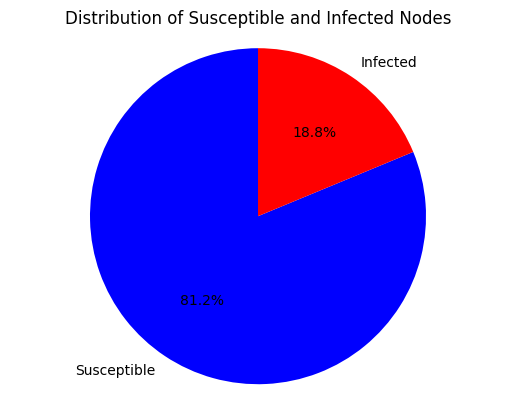

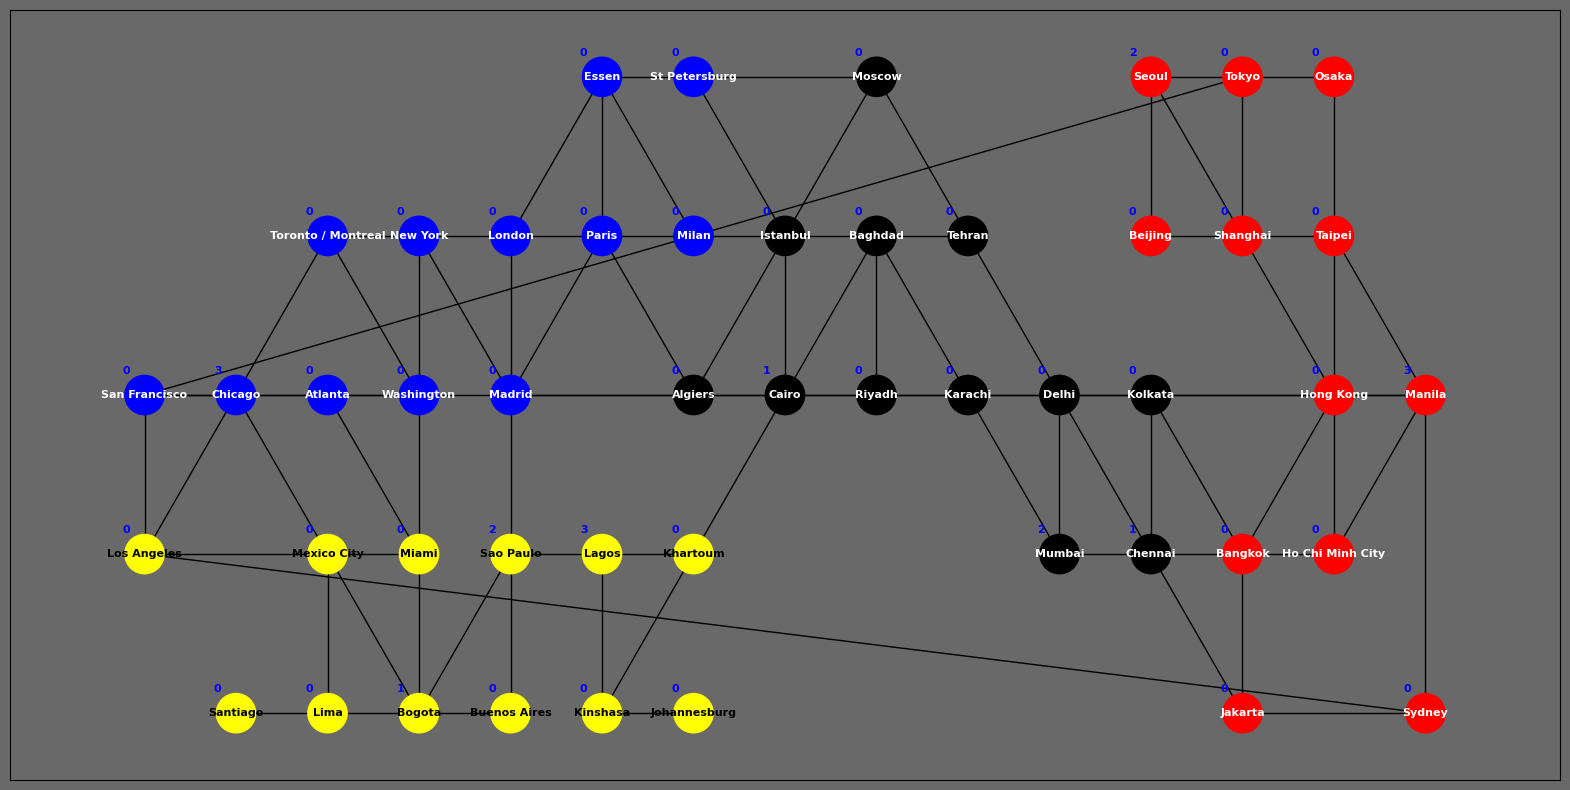

Chicago
Manila
Lagos
Sao Paulo
Step 0:
Susceptible: 29
Infection: 19
Blue Infection with 1 cube: 10
Blue Infection with 2 cubes: 5
Blue Infection with 3 cubes: 4
Percentage of Infected Nodes: 39.58%
Total Cubes on the Field: 32
Avg Cubes per Node: 0.67


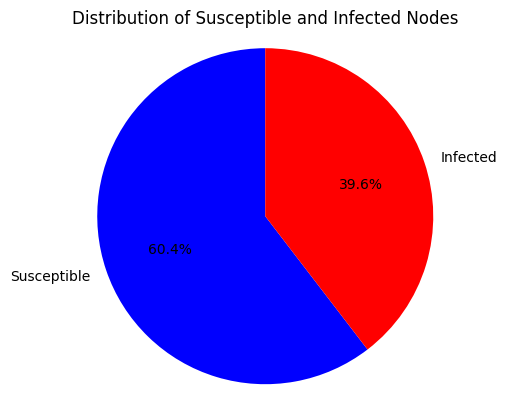

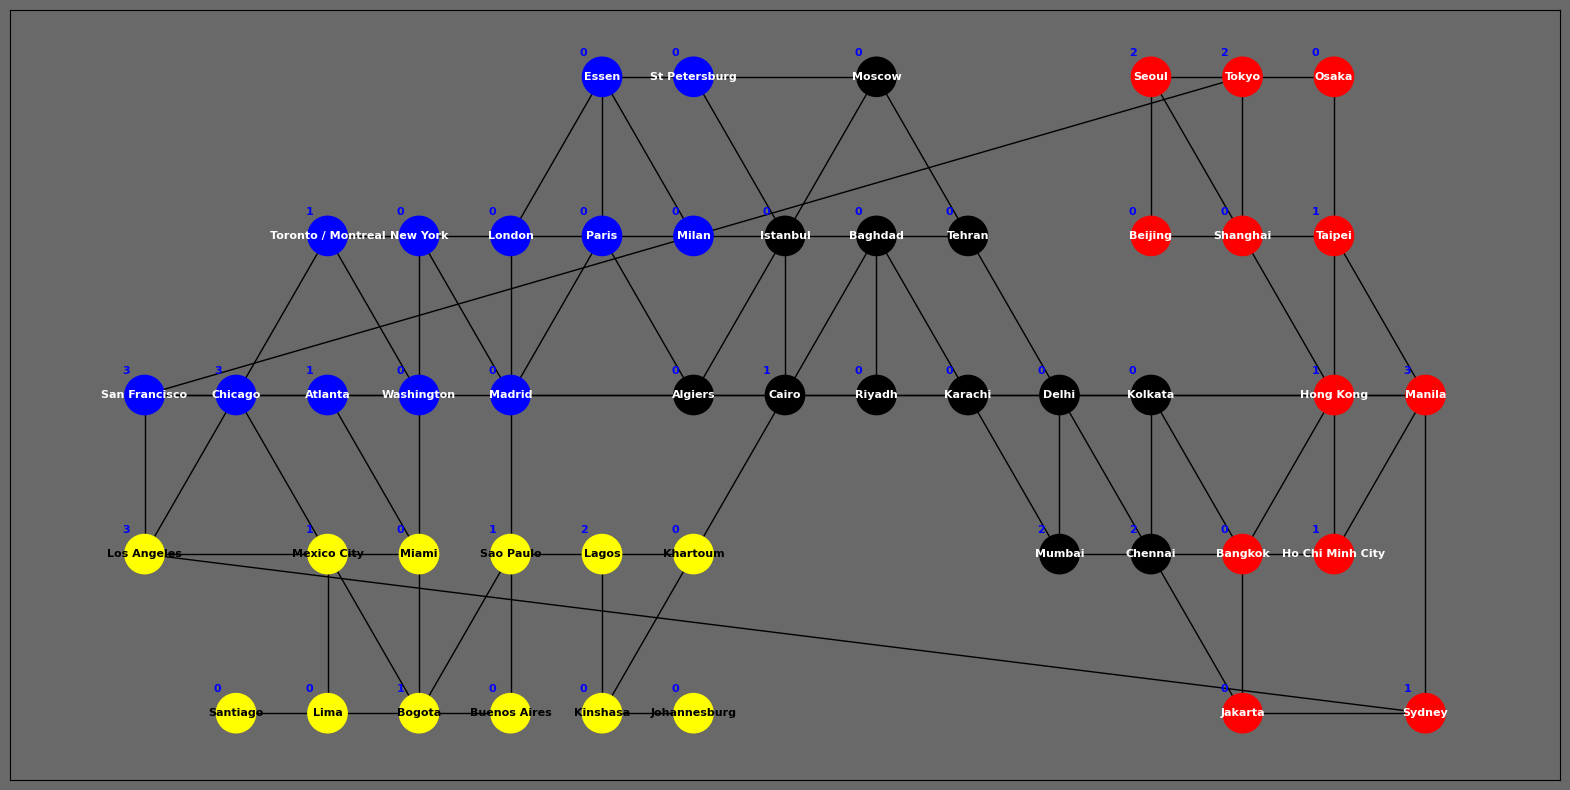

Chicago
Manila
San Francisco
Los Angeles
Step 1:
Susceptible: 29
Infection: 19
Blue Infection with 1 cube: 10
Blue Infection with 2 cubes: 7
Blue Infection with 3 cubes: 2
Percentage of Infected Nodes: 39.58%
Total Cubes on the Field: 30
Avg Cubes per Node: 0.62


KeyboardInterrupt: 

In [ ]:
strategy = "combined"  # Choose one of the strategies: "random", "most_cubes", "highest_degree", "combined"
model = initialize_pandemic_model(Graph_gameboard, strategy, 4)
simulate_pandemic(model, 27)  # Run simulation for 10 steps

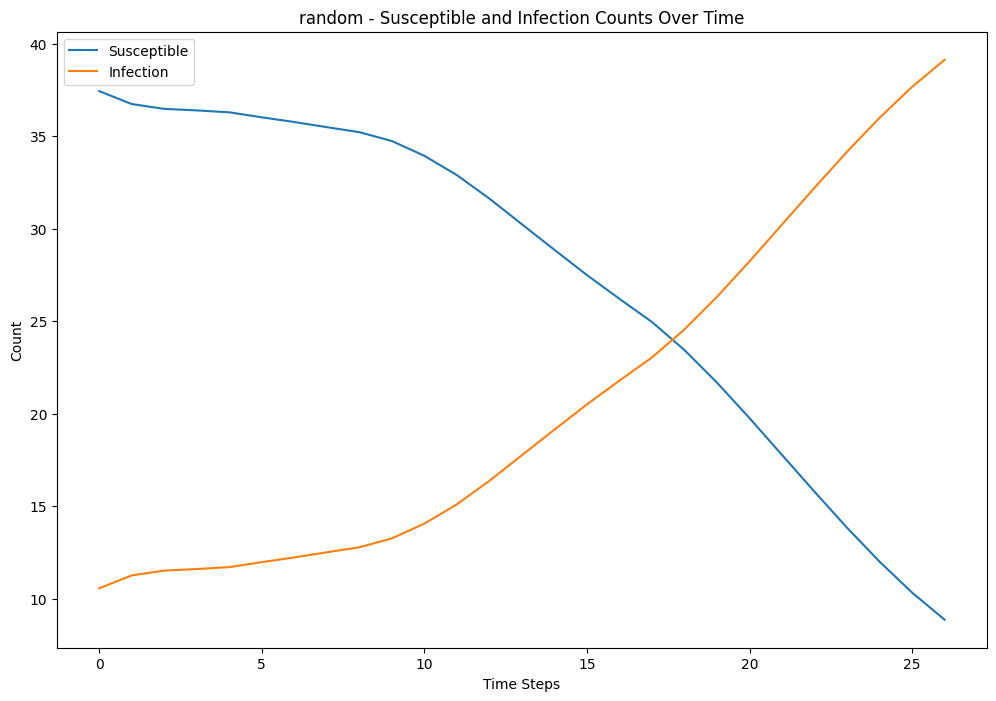

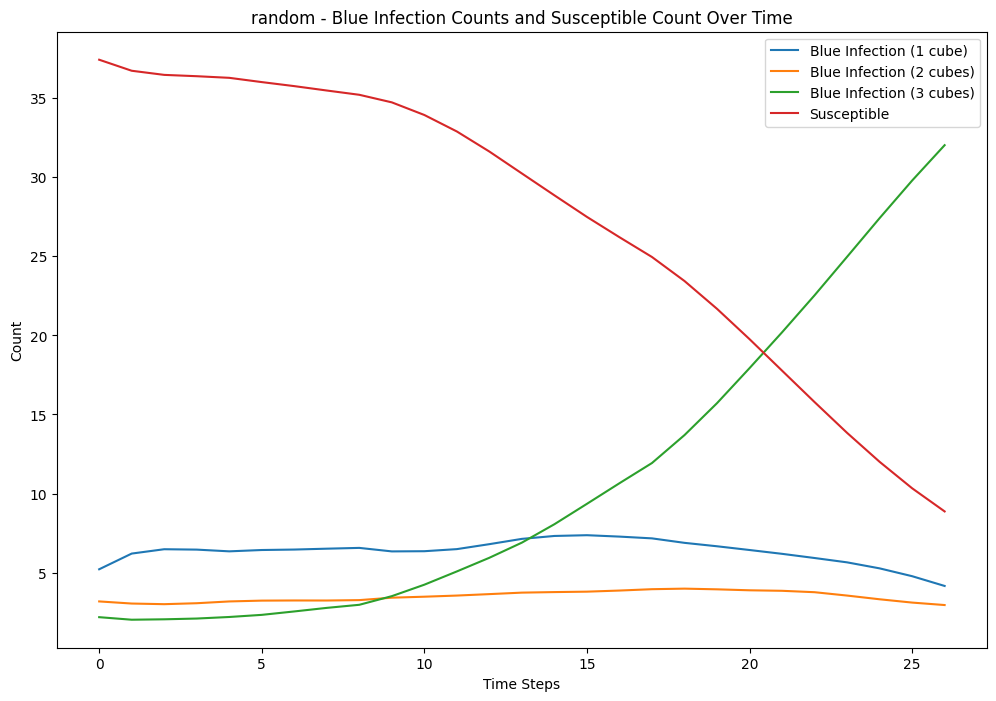

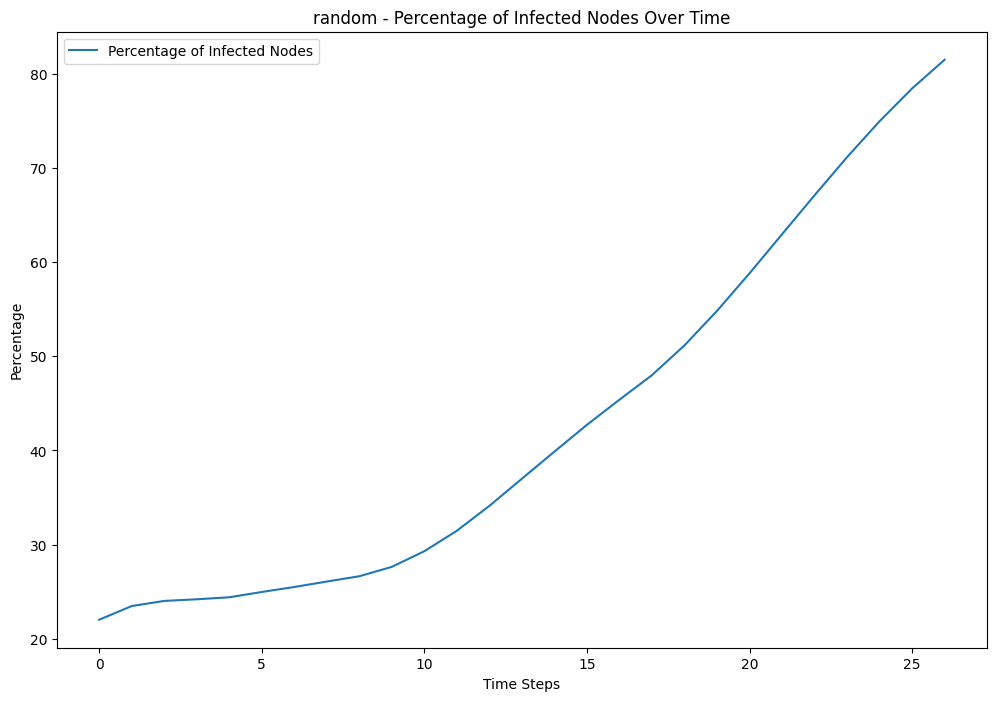

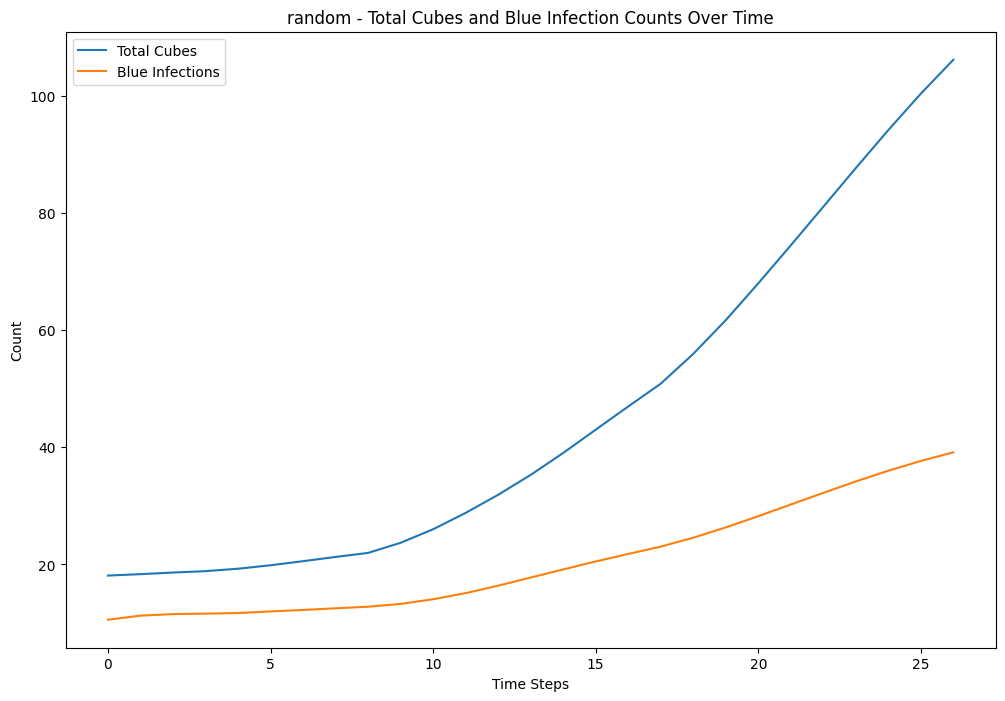

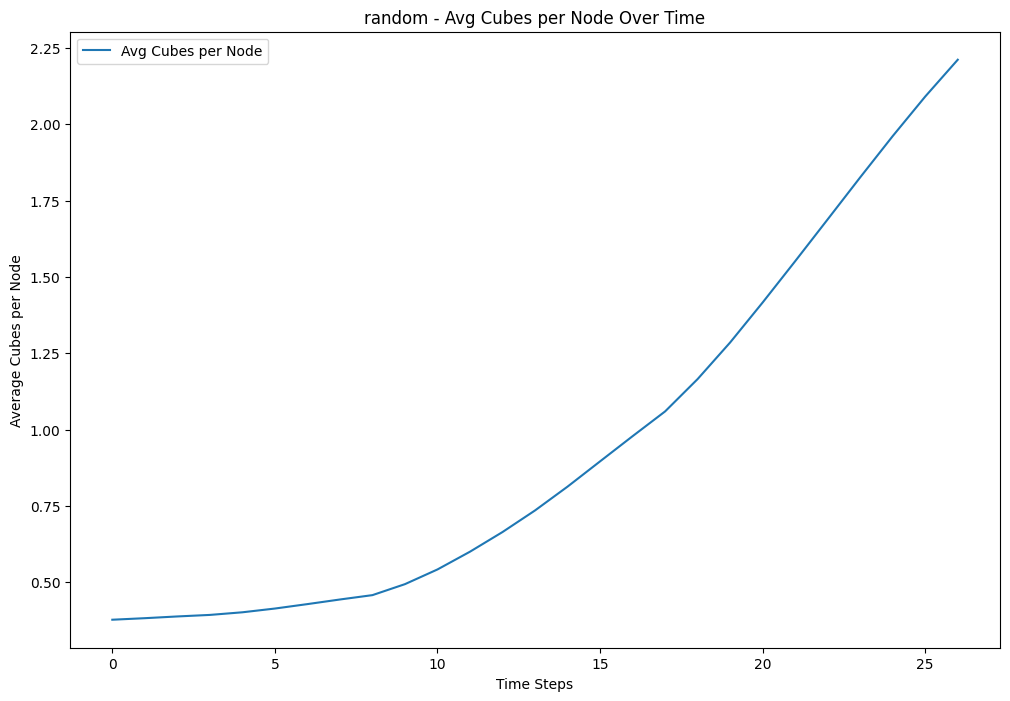

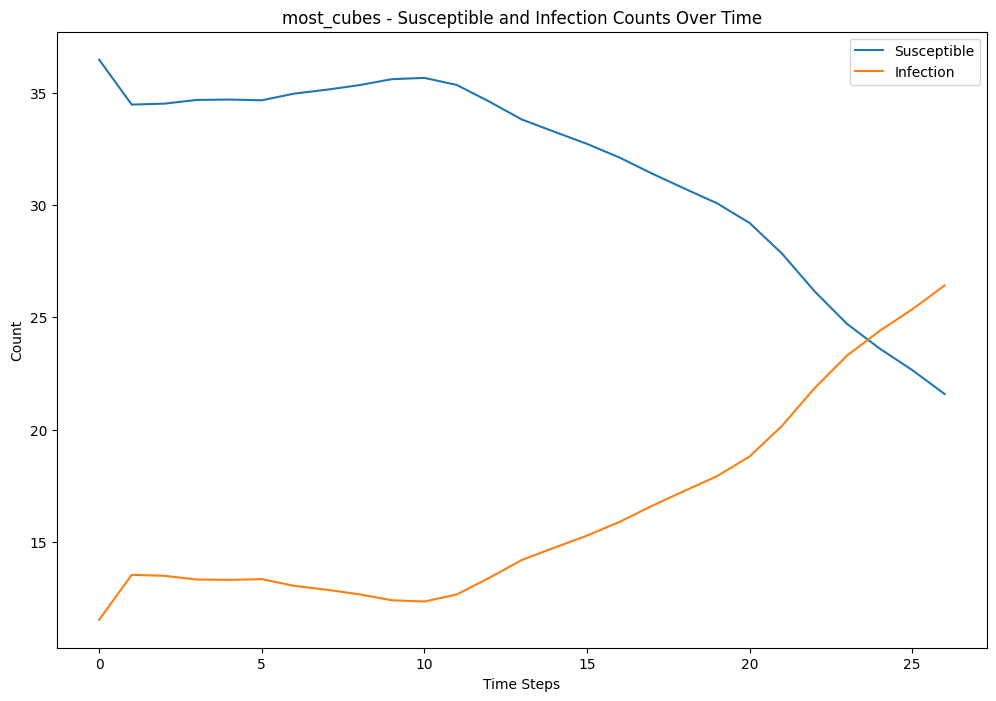

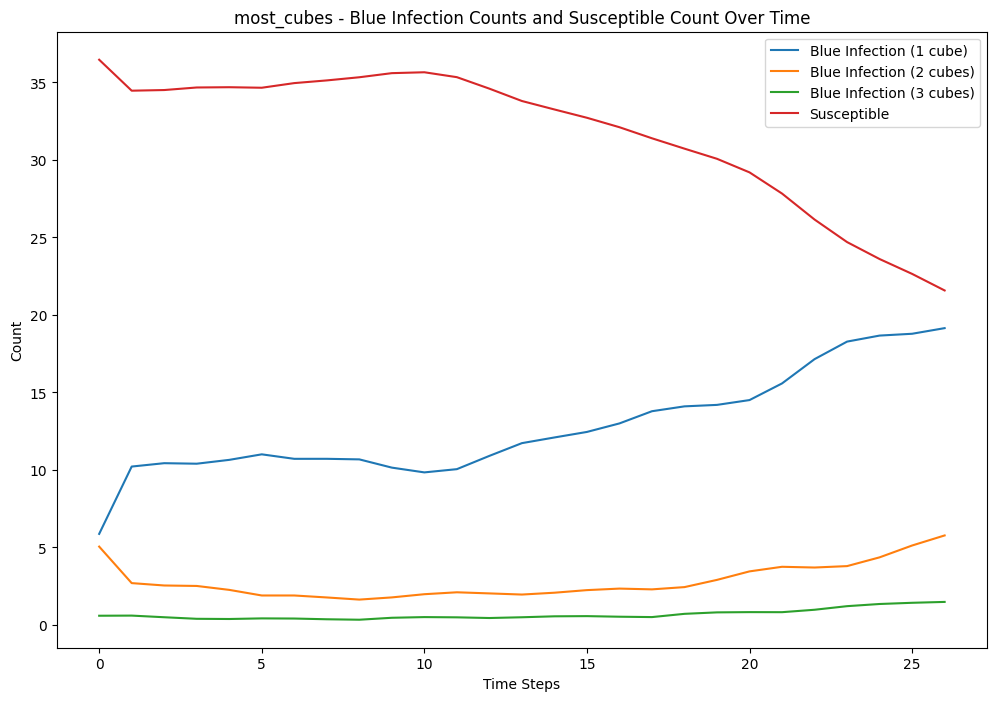

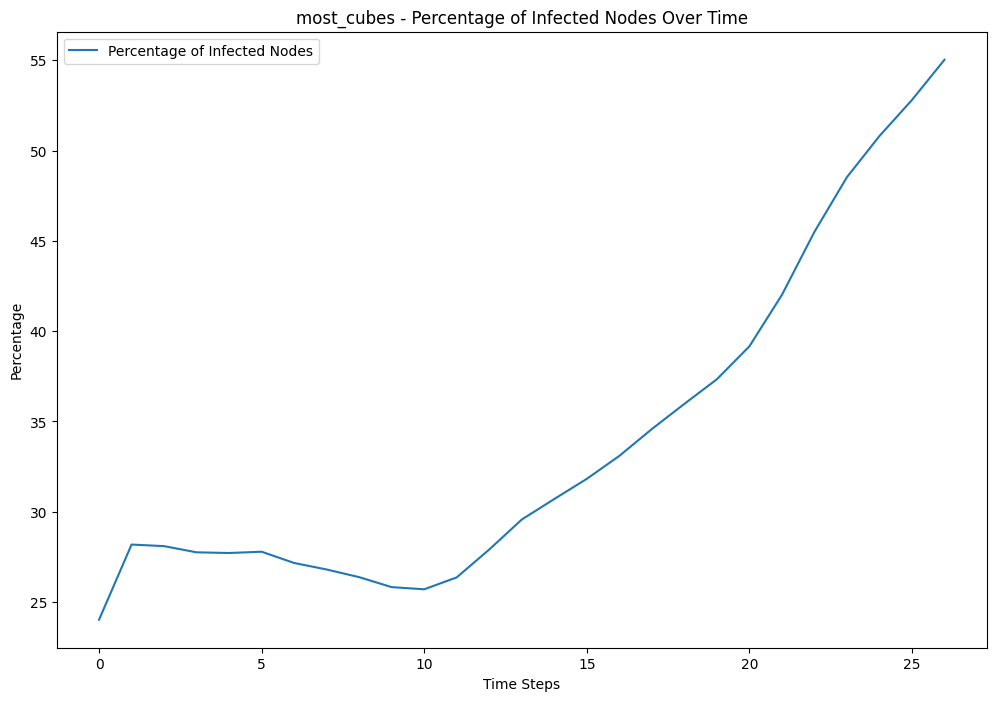

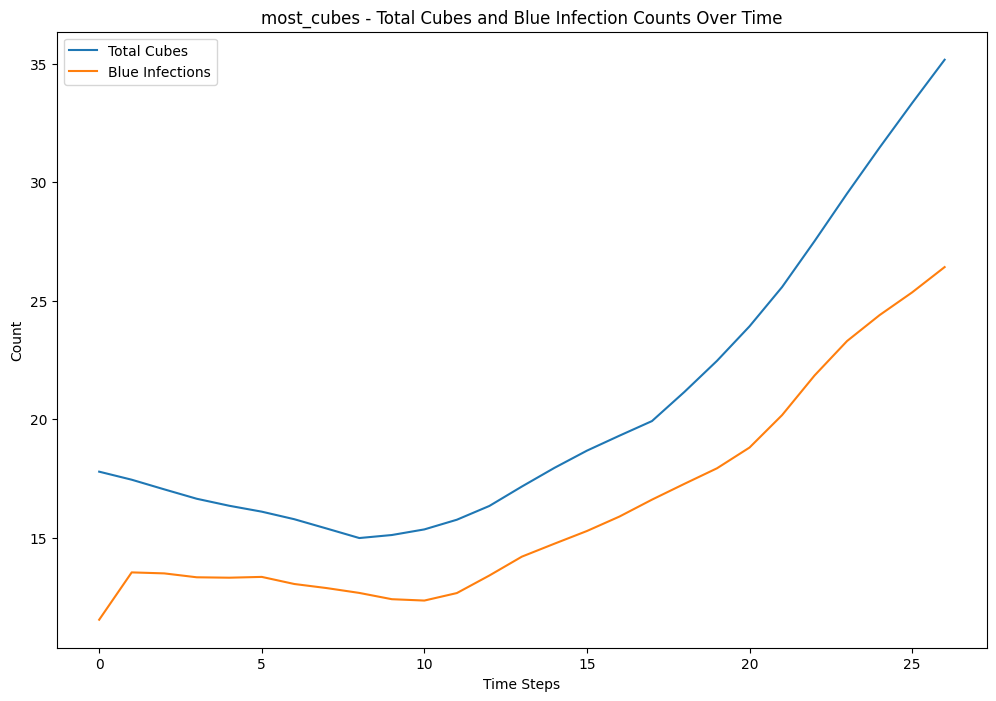

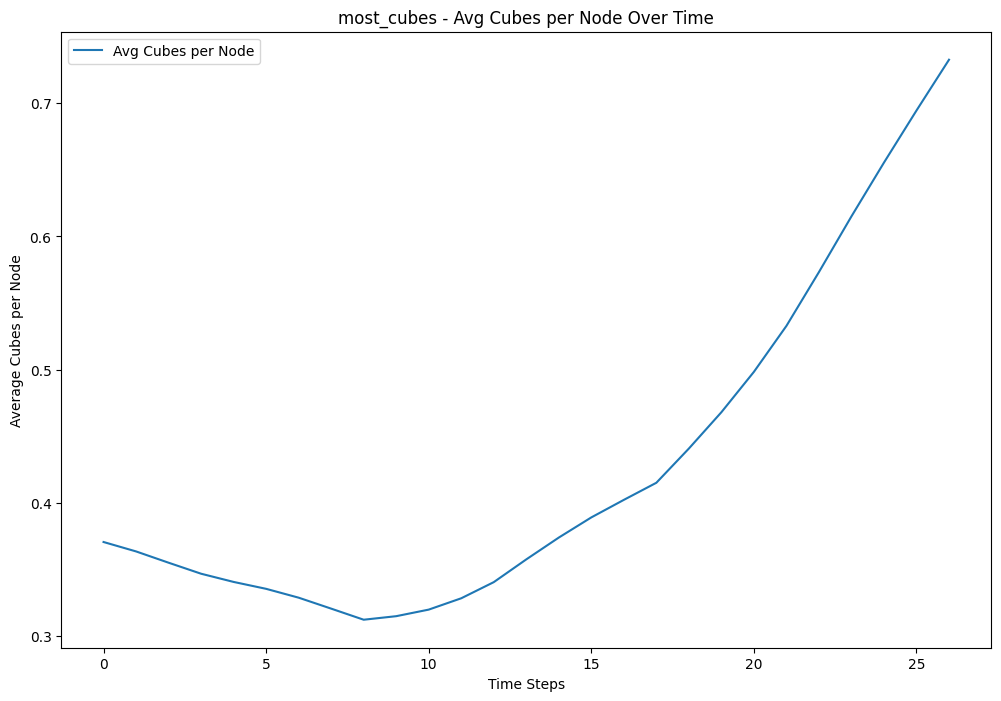

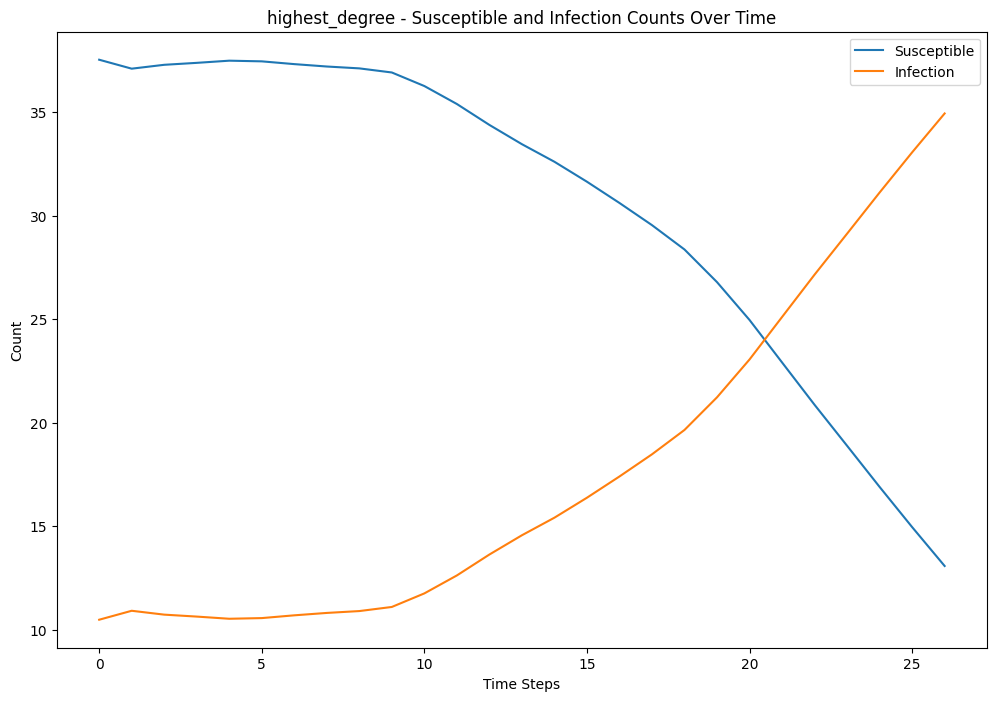

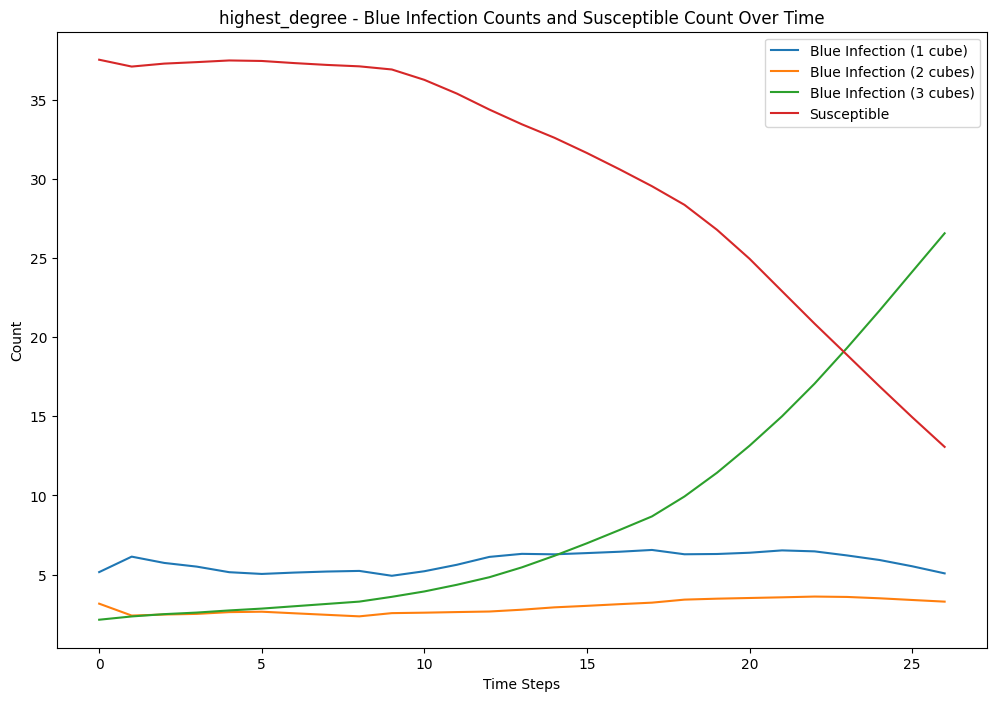

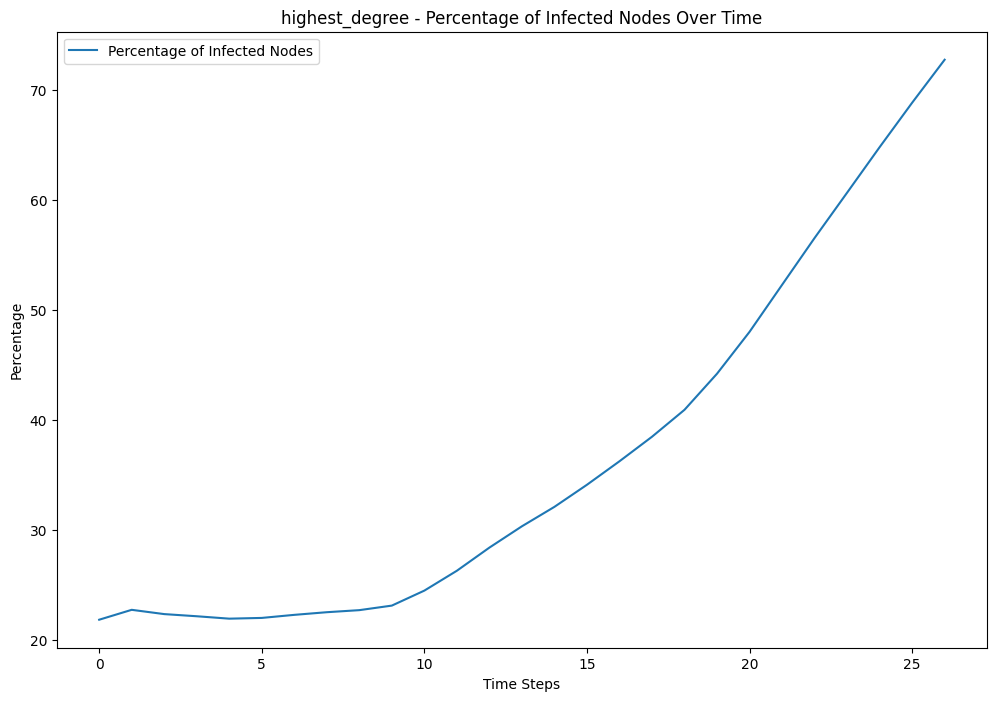

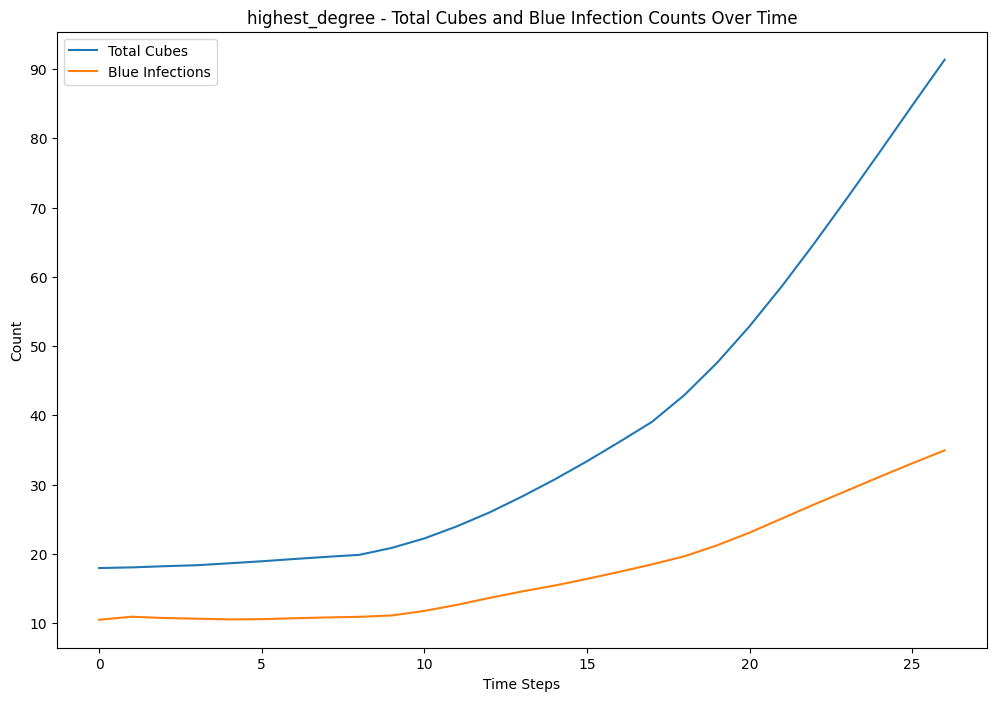

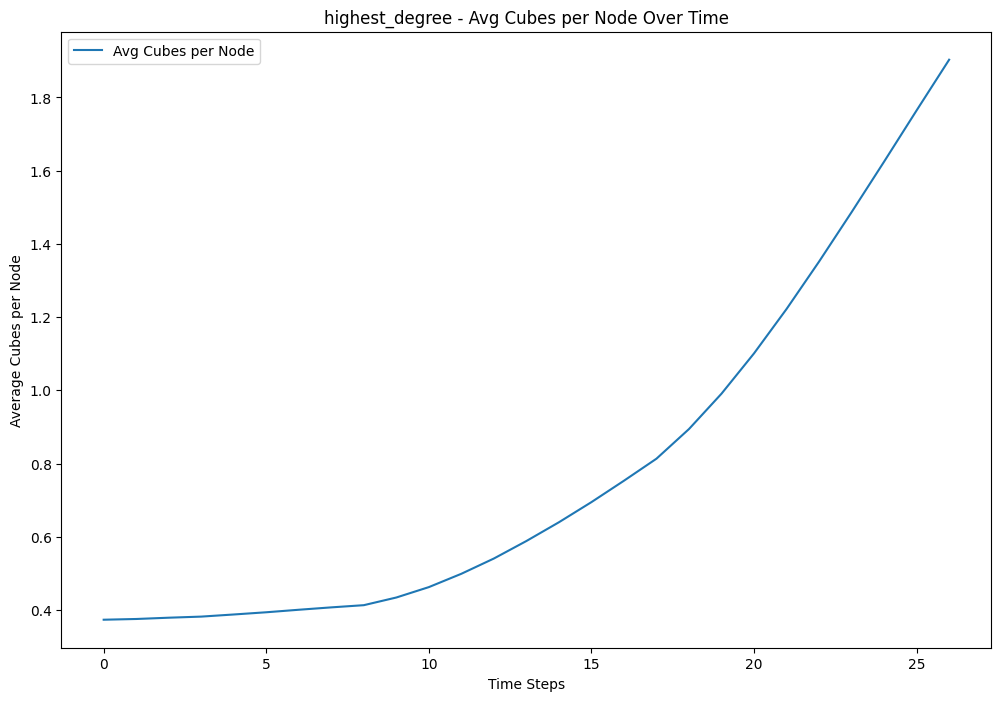

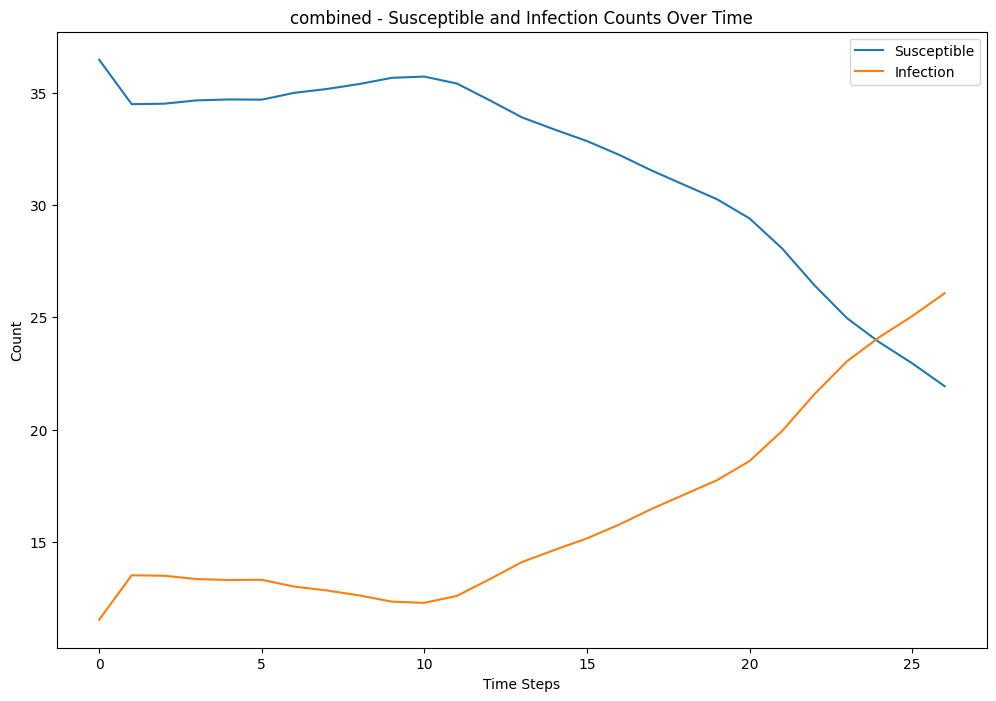

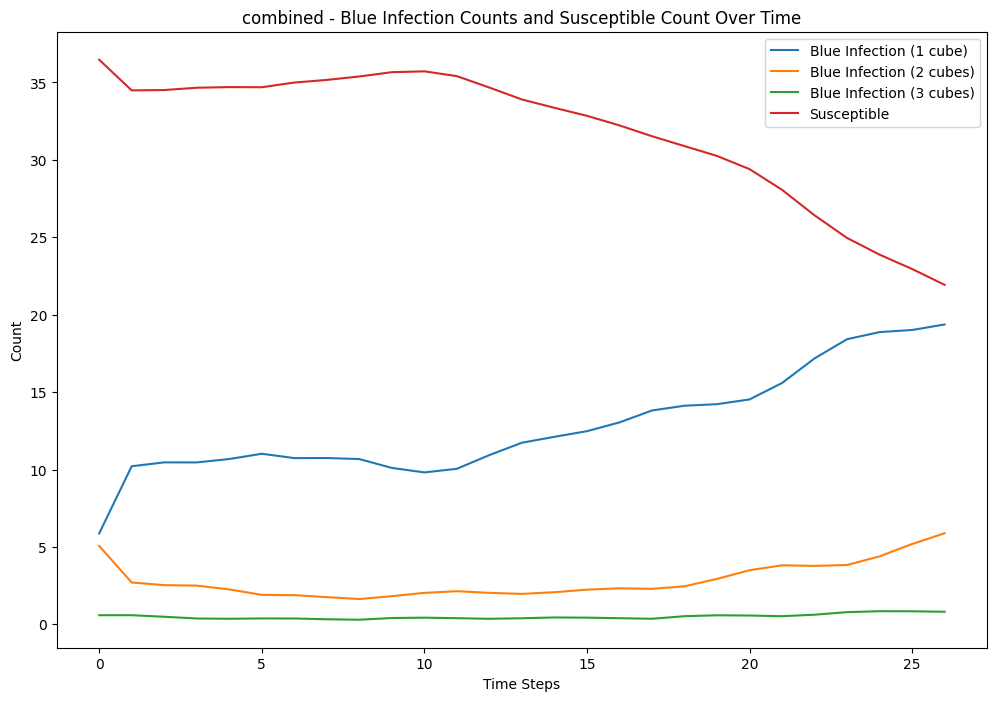

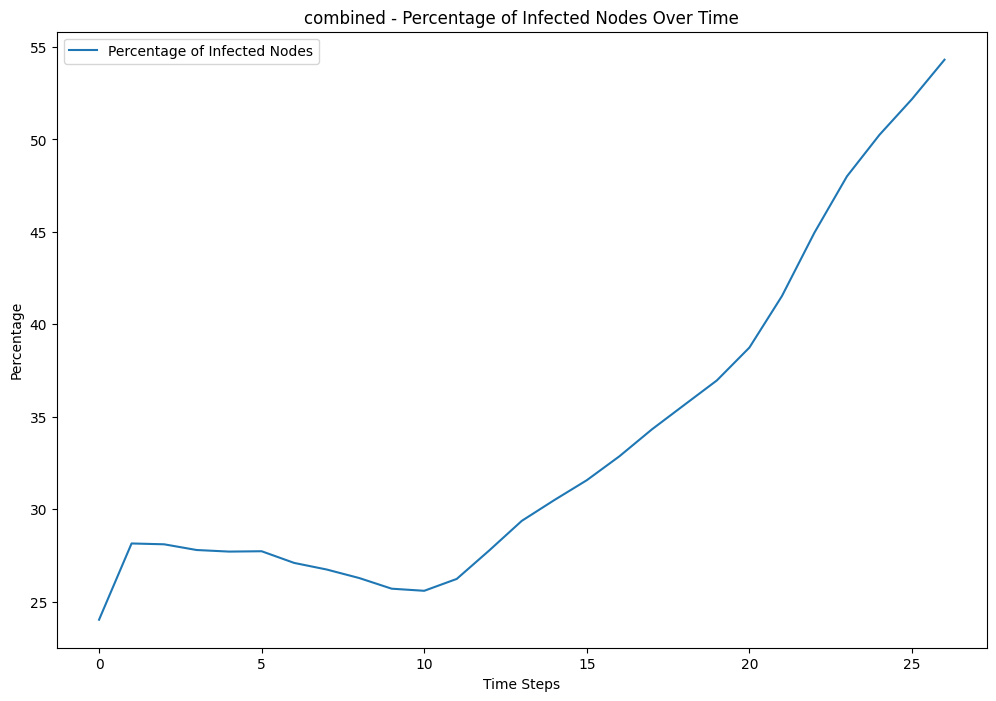

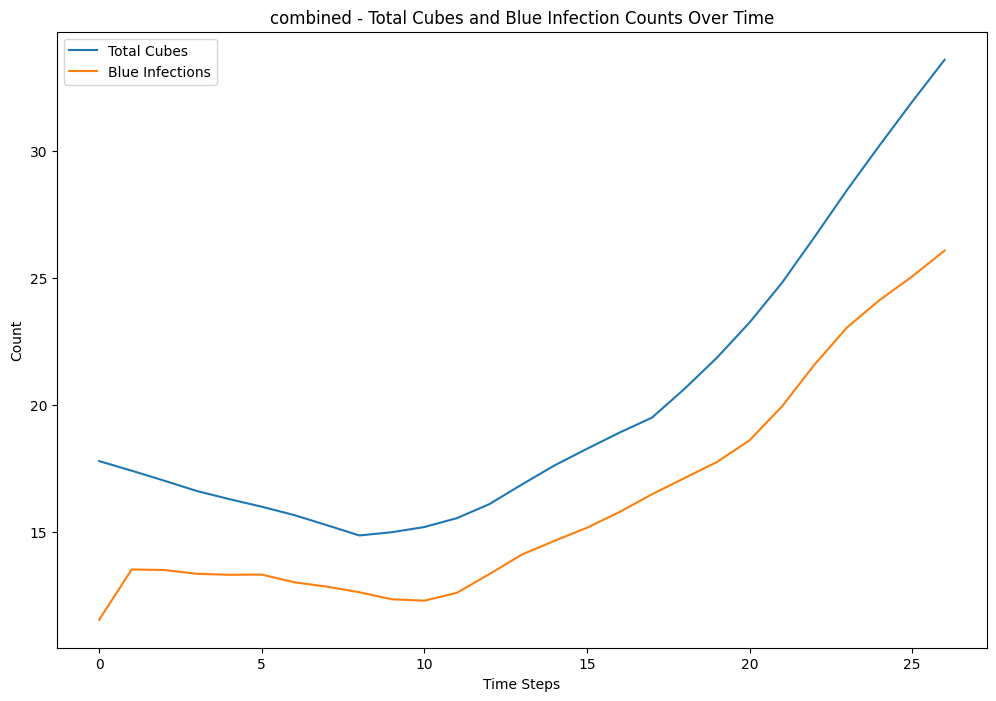

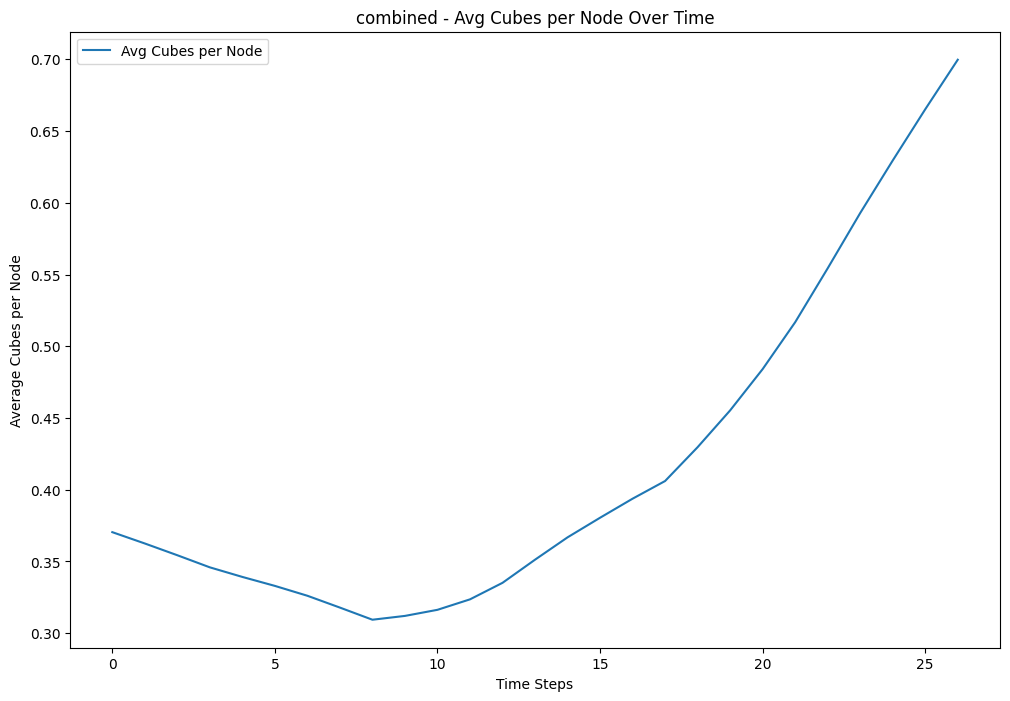

In [195]:
def simulate_pandemic(model, num_steps):
    graph = model["graph"]  # Get the graph and stacks from the model
    infection_stack = model["infection_stack"]
    infection_discard_stack = model["infection_discard_stack"]
    player_stack = model["player_stack"]
    infection_rate = model["infection_rate"] # [2, 2, 2, 3, 3, 4, 4]
    infection_rate_counter = model["infection_rate_counter"]
    outbreak_counter = model["outbreak_counter"]
    disinfection_strategy = model["disinfection_strategy"]
    k_actions = model["k_actions"]

    # Initialize lists to store statistics for each step
    statistics = []

    for step in range(num_steps):
        # Perform actions (disinfection)
        if disinfection_strategy == "random":
            random_disinfection(graph, k_actions)
        elif disinfection_strategy == "most_cubes":
            disinfect_most_cubes(graph, k_actions)
        elif disinfection_strategy == "highest_degree":
            disinfect_highest_degree(graph, k_actions)
        elif disinfection_strategy == "combined":
            disinfect_combined(graph, k_actions)

        # Draw 2 Player cards
        for i in range(2):
            card_player_drawn = player_stack.pop()

            if card_player_drawn == "Epidemic":
                infection_rate_counter += 1

                node_to_outbreak = infection_stack.popleft()
                infection_discard_stack.append(node_to_outbreak)

                while graph.nodes[node_to_outbreak]["disease_counters"]["blue"] != 3:
                    graph.nodes[node_to_outbreak]["disease_counters"]["blue"] += 1

                outbreak(graph, node_to_outbreak, "blue", set(node_to_outbreak), outbreak_counter + 1)

                random.shuffle(infection_discard_stack)
                infection_stack.extend(infection_discard_stack)
                infection_discard_stack.clear()

        # Draw as many cards as infection rate and infect the cities by 1 cube
        for i in range(infection_rate[infection_rate_counter]):
            node_to_infect = infection_stack.pop()
            infection_discard_stack.append(node_to_infect)

            disease_counter = graph.nodes[node_to_infect]["disease_counters"]["blue"]

            if disease_counter == 3:
                outbreak(graph, node_to_infect, "blue", set(node_to_infect), outbreak_counter + 1)
            else:
                graph.nodes[node_to_infect]["disease_counters"]["blue"] += 1

        # Count node statuses and append to statistics
        statistics.append(count_node_statuses(graph))

    return statistics

# Example usage

num_simulations = 100000
num_steps = 27
k_action = 4

# Define strategies
strategies = ["random", "most_cubes", "highest_degree", "combined"]

# Collect statistics for each strategy over multiple simulations
all_statistics = []

for strategy in strategies:
    strategy_statistics = []
    for _ in range(num_simulations):
        model = initialize_pandemic_model(Graph_gameboard, strategy, k_action)
        strategy_statistics.append(simulate_pandemic(model, num_steps))
    all_statistics.append(strategy_statistics)

# Calculate average statistics over simulations for each strategy
avg_statistics = []

for strategy_statistics in all_statistics:
    avg_strategy_statistics = np.mean(strategy_statistics, axis=0)
    avg_statistics.append(avg_strategy_statistics)

# Plot the average statistics separately for each strategy
for i, strategy in enumerate(strategies):
    # Plot Susceptible and Infection Counts Over Time
    plt.figure(figsize=(12, 8))
    plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
    plt.plot(range(num_steps), [stats[1] for stats in avg_statistics[i]], label='Infection')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.title(f'{strategy} - Susceptible and Infection Counts Over Time')
    plt.legend()
    plt.show()

    # Plot Blue Infection counts (with 1, 2, and 3 cubes) and Susceptible count over time steps
    plt.figure(figsize=(12, 8))
    plt.plot(range(num_steps), [stats[2] for stats in avg_statistics[i]], label='Blue Infection (1 cube)')
    plt.plot(range(num_steps), [stats[3] for stats in avg_statistics[i]], label='Blue Infection (2 cubes)')
    plt.plot(range(num_steps), [stats[4] for stats in avg_statistics[i]], label='Blue Infection (3 cubes)')
    plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.title(f'{strategy} - Blue Infection Counts and Susceptible Count Over Time')
    plt.legend()
    plt.show()

    # Plot Percentage of Infected Nodes over time steps
    plt.figure(figsize=(12, 8))
    plt.plot(range(num_steps), [stats[5] for stats in avg_statistics[i]], label='Percentage of Infected Nodes')
    plt.xlabel('Time Steps')
    plt.ylabel('Percentage')
    plt.title(f'{strategy} - Percentage of Infected Nodes Over Time')
    plt.legend()
    plt.show()

    # Plot Total Cubes and Blue Infection counts over time steps
    plt.figure(figsize=(12, 8))
    plt.plot(range(num_steps), [stats[6] for stats in avg_statistics[i]], label='Total Cubes')
    plt.plot(range(num_steps), [stats[2] + stats[3] + stats[4] for stats in avg_statistics[i]], label='Blue Infections')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.title(f'{strategy} - Total Cubes and Blue Infection Counts Over Time')
    plt.legend()
    plt.show()

    # Plot Avg Cubes per Node over time steps
    plt.figure(figsize=(12, 8))
    plt.plot(range(num_steps), [stats[7] for stats in avg_statistics[i]], label='Avg Cubes per Node')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Cubes per Node')
    plt.title(f'{strategy} - Avg Cubes per Node Over Time')
    plt.legend()
    plt.show()


In [ ]:
def simulate_pandemic(model, num_steps):
    graph = model["graph"]  # Get the graph and stacks from the model
    infection_stack = model["infection_stack"]
    infection_discard_stack = model["infection_discard_stack"]
    player_stack = model["player_stack"]
    infection_rate = model["infection_rate"] # [2, 2, 2, 3, 3, 4, 4]
    infection_rate_counter = model["infection_rate_counter"]
    outbreak_counter = model["outbreak_counter"]
    disinfection_strategy = model["disinfection_strategy"]
    k_actions = model["k_actions"]

    # Initialize lists to store statistics for each step
    statistics = []

    for step in range(num_steps):
        # Perform actions (disinfection)
        if disinfection_strategy == "random":
            random_disinfection(graph, k_actions)
        elif disinfection_strategy == "most_cubes":
            disinfect_most_cubes(graph, k_actions)
        elif disinfection_strategy == "highest_degree":
            disinfect_highest_degree(graph, k_actions)
        elif disinfection_strategy == "combined":
            disinfect_combined(graph, k_actions)

        # Draw 2 Player cards
        for i in range(2):
            card_player_drawn = player_stack.pop()

            if card_player_drawn == "Epidemic":
                infection_rate_counter += 1

                node_to_outbreak = infection_stack.popleft()
                infection_discard_stack.append(node_to_outbreak)

                while graph.nodes[node_to_outbreak]["disease_counters"]["blue"] != 3:
                    graph.nodes[node_to_outbreak]["disease_counters"]["blue"] += 1

                outbreak(graph, node_to_outbreak, "blue", set(node_to_outbreak), outbreak_counter + 1)

                random.shuffle(infection_discard_stack)
                infection_stack.extend(infection_discard_stack)
                infection_discard_stack.clear()

        # Draw as many cards as infection rate and infect the cities by 1 cube
        for i in range(infection_rate[infection_rate_counter]):
            node_to_infect = infection_stack.pop()
            infection_discard_stack.append(node_to_infect)

            disease_counter = graph.nodes[node_to_infect]["disease_counters"]["blue"]

            if disease_counter == 3:
                outbreak(graph, node_to_infect, "blue", set(node_to_infect), outbreak_counter + 1)
            else:
                graph.nodes[node_to_infect]["disease_counters"]["blue"] += 1

        # Count node statuses and append to statistics
        statistics.append(count_node_statuses(graph))

    return statistics

# Example usage

num_simulations = 100000
num_steps = 27
k_actions_range = range(9)  # Range of k_actions: 0 to 8

# Define strategies
strategies = ["random", "most_cubes", "highest_degree", "combined"]

for k_action in k_actions_range:
    # Collect statistics for each strategy over multiple simulations
    all_statistics = []

    for strategy in strategies:
        strategy_statistics = []
        for _ in range(num_simulations):
            model = initialize_pandemic_model(Graph_gameboard, strategy, k_action)
            strategy_statistics.append(simulate_pandemic(model, num_steps))
        all_statistics.append(strategy_statistics)

    # Calculate average statistics over simulations for each strategy
    avg_statistics = []

    for strategy_statistics in all_statistics:
        avg_strategy_statistics = np.mean(strategy_statistics, axis=0)
        avg_statistics.append(avg_strategy_statistics)

    # Plot the average statistics separately for each strategy and each k_action
    for i, strategy in enumerate(strategies):
        # Plot Susceptible and Infection Counts Over Time
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
        plt.plot(range(num_steps), [stats[1] for stats in avg_statistics[i]], label='Infection')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Susceptible and Infection Counts Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Blue Infection counts (with 1, 2, and 3 cubes) and Susceptible count over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[2] for stats in avg_statistics[i]], label='Blue Infection (1 cube)')
        plt.plot(range(num_steps), [stats[3] for stats in avg_statistics[i]], label='Blue Infection (2 cubes)')
        plt.plot(range(num_steps), [stats[4] for stats in avg_statistics[i]], label='Blue Infection (3 cubes)')
        plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Blue Infection Counts and Susceptible Count Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Percentage of Infected Nodes over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[5] for stats in avg_statistics[i]], label='Percentage of Infected Nodes')
        plt.xlabel('Time Steps')
        plt.ylabel('Percentage')
        plt.title(f'{strategy} - Percentage of Infected Nodes Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Total Cubes and Blue Infection counts over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[6] for stats in avg_statistics[i]], label='Total Cubes')
        plt.plot(range(num_steps), [stats[2] + stats[3] + stats[4] for stats in avg_statistics[i]], label='Blue Infections')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Total Cubes and Blue Infection Counts Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Avg Cubes per Node over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[7] for stats in avg_statistics[i]], label='Avg Cubes per Node')
        plt.xlabel('Time Steps')
        plt.ylabel('Average Cubes per Node')
        plt.title(f'{strategy} - Avg Cubes per Node Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

In [ ]:
def simulate_pandemic(model, num_steps):
    graph = model["graph"]  # Get the graph and stacks from the model
    infection_stack = model["infection_stack"]
    infection_discard_stack = model["infection_discard_stack"]
    player_stack = model["player_stack"]
    infection_rate = model["infection_rate"] # [2, 2, 2, 3, 3, 4, 4]
    infection_rate_counter = model["infection_rate_counter"]
    outbreak_counter = model["outbreak_counter"]
    disinfection_strategy = model["disinfection_strategy"]
    k_actions = model["k_actions"]

    # Initialize lists to store statistics for each step
    statistics = []

    for step in range(num_steps):
        # Perform actions (disinfection)
        if disinfection_strategy == "random":
            random_disinfection(graph, k_actions)
        elif disinfection_strategy == "most_cubes":
            disinfect_most_cubes(graph, k_actions)
        elif disinfection_strategy == "highest_degree":
            disinfect_highest_degree(graph, k_actions)
        elif disinfection_strategy == "combined":
            disinfect_combined(graph, k_actions)

        # Draw 2 Player cards
        for i in range(2):
            card_player_drawn = player_stack.pop()

            if card_player_drawn == "Epidemic":
                infection_rate_counter += 1

                node_to_outbreak = infection_stack.popleft()
                infection_discard_stack.append(node_to_outbreak)

                while graph.nodes[node_to_outbreak]["disease_counters"]["blue"] != 3:
                    graph.nodes[node_to_outbreak]["disease_counters"]["blue"] += 1

                outbreak(graph, node_to_outbreak, "blue", set(node_to_outbreak), outbreak_counter + 1)

                random.shuffle(infection_discard_stack)
                infection_stack.extend(infection_discard_stack)
                infection_discard_stack.clear()

        # Draw as many cards as infection rate and infect the cities by 1 cube
        for i in range(infection_rate[infection_rate_counter]):
            node_to_infect = infection_stack.pop()
            infection_discard_stack.append(node_to_infect)

            disease_counter = graph.nodes[node_to_infect]["disease_counters"]["blue"]

            if disease_counter == 3:
                outbreak(graph, node_to_infect, "blue", set(node_to_infect), outbreak_counter + 1)
            else:
                graph.nodes[node_to_infect]["disease_counters"]["blue"] += 1

        # Count node statuses and append to statistics
        statistics.append(count_node_statuses(graph))

    return statistics

# Example usage

num_simulations = 250000
num_steps = 27
k_actions_range = range(9)  # Range of k_actions: 0 to 8

# Define strategies
strategies = ["random", "most_cubes", "highest_degree", "combined"]

for k_action in k_actions_range:
    # Collect statistics for each strategy over multiple simulations
    all_statistics = []

    for strategy in strategies:
        strategy_statistics = []
        for _ in range(num_simulations):
            model = initialize_pandemic_model(Graph_gameboard, strategy, k_action)
            strategy_statistics.append(simulate_pandemic(model, num_steps))
        all_statistics.append(strategy_statistics)

    # Calculate average statistics over simulations for each strategy
    avg_statistics = []

    for strategy_statistics in all_statistics:
        avg_strategy_statistics = np.mean(strategy_statistics, axis=0)
        avg_statistics.append(avg_strategy_statistics)

    # Plot the average statistics separately for each strategy and each k_action
    for i, strategy in enumerate(strategies):
        # Plot Susceptible and Infection Counts Over Time
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
        plt.plot(range(num_steps), [stats[1] for stats in avg_statistics[i]], label='Infection')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Susceptible and Infection Counts Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Blue Infection counts (with 1, 2, and 3 cubes) and Susceptible count over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[2] for stats in avg_statistics[i]], label='Blue Infection (1 cube)')
        plt.plot(range(num_steps), [stats[3] for stats in avg_statistics[i]], label='Blue Infection (2 cubes)')
        plt.plot(range(num_steps), [stats[4] for stats in avg_statistics[i]], label='Blue Infection (3 cubes)')
        plt.plot(range(num_steps), [stats[0] for stats in avg_statistics[i]], label='Susceptible')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Blue Infection Counts and Susceptible Count Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Percentage of Infected Nodes over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[5] for stats in avg_statistics[i]], label='Percentage of Infected Nodes')
        plt.xlabel('Time Steps')
        plt.ylabel('Percentage')
        plt.title(f'{strategy} - Percentage of Infected Nodes Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Total Cubes and Blue Infection counts over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[6] for stats in avg_statistics[i]], label='Total Cubes')
        plt.plot(range(num_steps), [stats[2] + stats[3] + stats[4] for stats in avg_statistics[i]], label='Blue Infections')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.title(f'{strategy} - Total Cubes and Blue Infection Counts Over Time (k_action={k_action})')
        plt.legend()
        plt.show()

        # Plot Avg Cubes per Node over time steps
        plt.figure(figsize=(12, 8))
        plt.plot(range(num_steps), [stats[7] for stats in avg_statistics[i]], label='Avg Cubes per Node')
        plt.xlabel('Time Steps')
        plt.ylabel('Average Cubes per Node')
        plt.title(f'{strategy} - Avg Cubes per Node Over Time (k_action={k_action})')
        plt.legend()
        plt.show()